In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LeakyReLU,PReLU,ELU 
from keras.layers import Dropout  

In [6]:
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
# concat
X=pd.concat([X,geography,gender],axis=1)
# Dropping
X.drop(['Geography','Gender'],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
classifier= Sequential()

In [13]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100


536/536 [==============================] - 4s 4ms/step - loss: 0.5790 - accuracy: 0.7033 - val_loss: 0.5118 - val_accuracy: 0.7963
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4762 - accuracy: 0.7964 - val_loss: 0.4636 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4444 - accuracy: 0.7994 - val_loss: 0.4411 - val_accuracy: 0.8005
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4275 - accuracy: 0.8067 - val_loss: 0.4278 - val_accuracy: 0.8103
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4138 - accuracy: 0.8173 - val_loss: 0.4158 - val_accuracy: 0.8148
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4007 - accuracy: 0.8270 - val_loss: 0.4054 - val_accuracy: 0.8213
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3889 - accuracy: 0.8352 - val_loss: 0.3956 - val_accuracy: 0.82

In [16]:
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)
y_pred


63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)

[[1499   96]
 [ 192  213]]
The accuracy of the model is 0.856
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.69      0.53      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


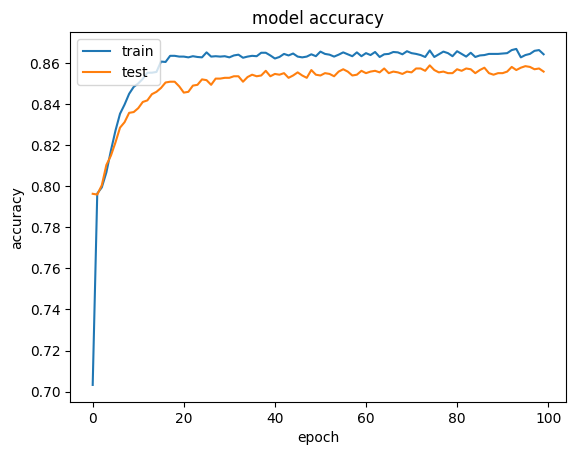

In [18]:
print(model_history.history.keys())
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()